**Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster



In [3]:
# Import the dataset
df=pd.read_csv('automobiles.csv')

# Display the number of rows and columns
print(df.shape)

# Display the first few rows of the dataset in DataFrame format
df.head()

(99, 13)


,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [7]:
df.columns = df.columns.str.replace(' ','_').str.lower()
df.head()

,age,profession,marrital_status,education,no_of_dependents,personal_loan,house_loan,wife_working,salary,wife_salary,total_salary,make,price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [9]:
df.describe()

,age,no_of_dependents,salary,wife_salary,total_salary,price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


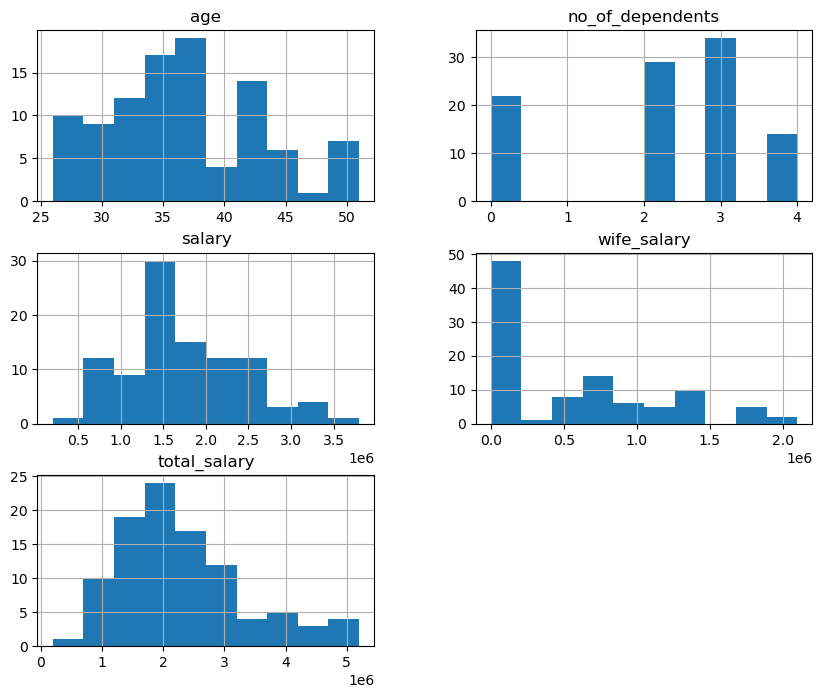

In [11]:
df[['age', 'no_of_dependents', 'salary','wife_salary','total_salary']].hist(figsize=(10,8))
plt.show()

In [15]:
df.columns

Index(['age', 'profession', 'marrital_status', 'education', 'no_of_dependents',
       'personal_loan', 'house_loan', 'wife_working', 'salary', 'wife_salary',
       'total_salary', 'make', 'price'],
      dtype='object')

In [19]:
features = ['age' ,'salary','total_salary', 'price']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[features] = scaler.fit_transform(df[features])
df.head()

,age,profession,marrital_status,education,no_of_dependents,personal_loan,house_loan,wife_working,salary,wife_salary,total_salary,make,price
0,-1.498630,Salaried,Single,Post Graduate,0,Yes,No,No,-1.397118,0,-1.406760,i20,-0.904843
1,-0.211304,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,-0.501877,600000,-0.258937,Ciaz,-0.445579
2,1.397855,Business,Married,Graduate,4,Yes,Yes,No,0.094950,0,-0.450240,Duster,0.013685
3,0.754191,Business,Married,Post Graduate,3,No,No,Yes,-0.203464,600000,-0.067633,City,0.013685
4,-0.854967,Salaried,Married,Post Graduate,2,Yes,No,Yes,0.094950,800000,0.314975,SUV,0.932213


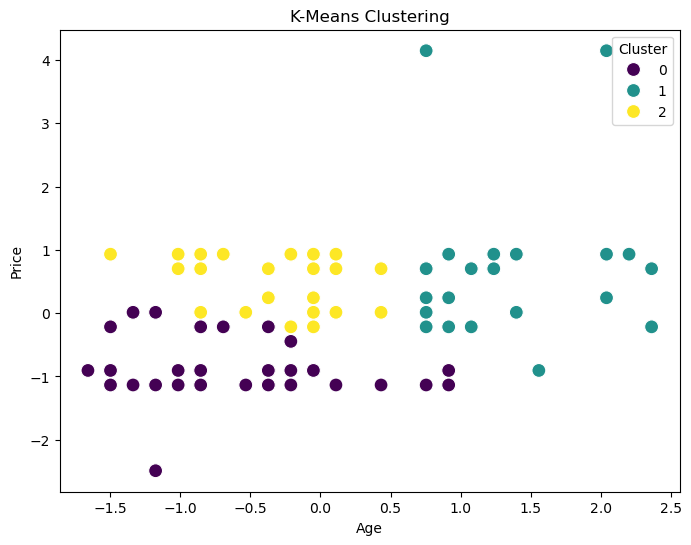

In [35]:
# Drop the 'country' column since it's not a numerical feature

df_cluster1=df.loc[:,["age","price"]]
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(df_cluster1)


df_cluster1['Cluster'] = Y

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='age', 
    y='price', 
    hue='Cluster', 
    palette='viridis', 
    data=df_cluster1, 
    s=100
)
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Price')
plt.legend(title='Cluster')
plt.show()

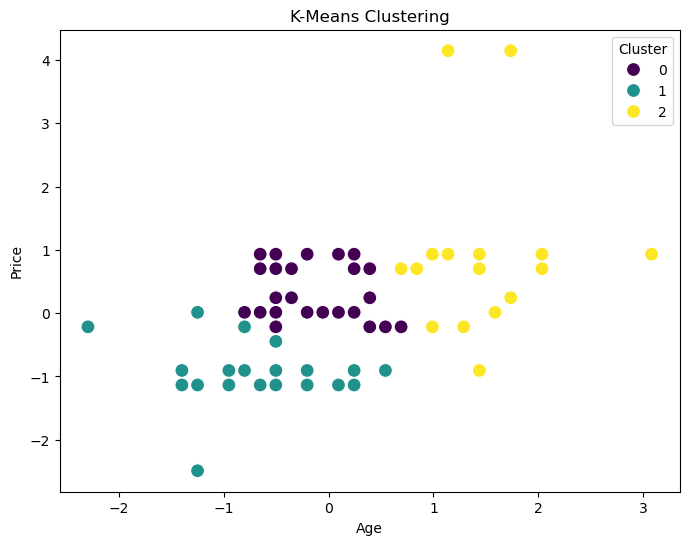

In [43]:
df_cluster2=df.loc[:,["salary","price"]]
kmeans = KMeans(n_clusters=3, init='k-means++')
Y = kmeans.fit_predict(df_cluster1)


df_cluster2['Cluster'] = Y

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='salary', 
    y='price', 
    hue='Cluster', 
    palette='viridis', 
    data=df_cluster1, 
    s=100
)
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Price')
plt.legend(title='Cluster')
plt.show()

In [49]:
df['cluster']=kmeans.labels_
df.head()

,age,profession,marrital_status,education,no_of_dependents,personal_loan,house_loan,wife_working,salary,wife_salary,total_salary,make,price,cluster
0,-1.498630,Salaried,Single,Post Graduate,0,Yes,No,No,-1.397118,0,-1.406760,i20,-0.904843,1
1,-0.211304,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,-0.501877,600000,-0.258937,Ciaz,-0.445579,1
2,1.397855,Business,Married,Graduate,4,Yes,Yes,No,0.094950,0,-0.450240,Duster,0.013685,0
3,0.754191,Business,Married,Post Graduate,3,No,No,Yes,-0.203464,600000,-0.067633,City,0.013685,0
4,-0.854967,Salaried,Married,Post Graduate,2,Yes,No,Yes,0.094950,800000,0.314975,SUV,0.932213,0


In [55]:

print("Inertia:", kmeans.inertia_)


centroids=kmeans.cluster_centers_
centroids



Inertia: 69.13098411855182


array([[-1.53728167e-01,  3.49301163e-01,  5.55111512e-16],
       [-7.87856856e-01, -9.61613059e-01,  1.00000000e+00],
       [ 1.43159356e+00,  8.74805199e-01,  2.00000000e+00]])

In [57]:
hc=AgglomerativeClustering(n_clusters=3,metric='cosine', linkage='complete')

hc.fit(df_cluster1)
df['Cluster_HC'] = hc.labels_
df.head()

,age,profession,marrital_status,education,no_of_dependents,personal_loan,house_loan,wife_working,salary,wife_salary,total_salary,make,price,cluster,Cluster_HC
0,-1.498630,Salaried,Single,Post Graduate,0,Yes,No,No,-1.397118,0,-1.406760,i20,-0.904843,1,2
1,-0.211304,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,-0.501877,600000,-0.258937,Ciaz,-0.445579,1,2
2,1.397855,Business,Married,Graduate,4,Yes,Yes,No,0.094950,0,-0.450240,Duster,0.013685,0,0
3,0.754191,Business,Married,Post Graduate,3,No,No,Yes,-0.203464,600000,-0.067633,City,0.013685,0,2
4,-0.854967,Salaried,Married,Post Graduate,2,Yes,No,Yes,0.094950,800000,0.314975,SUV,0.932213,0,1
